# Дипломное задание
Данные - реальная компания, продающая оборудование. Они подкорректированные , т.к. под NDA  
Берем оттуда месяц и год продаж, клиенты, сумма продаж.  
Необходимо проанализировать продажи и дать рекомендации бизнесу  
По итогу   
дадим рекомендацию по кол-во сейос менеджеров в отделе продаж  
предскажим оборот на ближайщее время  
построим модели , предсказывающие продажи в августе  

In [1]:
import numpy as np
import pandas as pd # Для работы с данными

In [2]:
df = pd.read_csv('Data_file.csv')

In [3]:
for i in range(df.shape[0]):
    df['Клиент'][i] = 'Клиент' + str(i) #убираем реальные названия клиентов для отображения
df.head()

<ipython-input-3-f23961020442>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Клиент'][i] = 'Клиент' + str(i) #убираем реальные названия клиентов для отображения


,Unnamed: 0,Клиент,01CY2019,02CY2019,03CY2019,04CY2019,05CY2019,06CY2019,07CY2019,08CY2019,...,11CY2021,12CY2021,01CY2022,02CY2022,03CY2022,04CY2022,05CY2022,06CY2022,07CY2022,08CY2022
0,0,Клиент0,4785.2,324.8,697.0,2250.0,18008.4,312.4,1517.8,3446.6,...,13940.4,30524.4,14192.2,18034.4,35431.0,33341.4,3313.4,7553.4,0.2,0.0
1,1,Клиент1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1674.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Клиент2,0.0,0.0,2804.8,1196.0,12240.0,0.0,0.0,0.0,...,0.0,290.4,0.0,4640.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Клиент3,0.0,0.0,0.0,17570.0,0.0,2620.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Клиент4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9208.0,8897.6,0.0,0.0,0.0,0.0,0.0,1898.0,0.0,0.0


In [4]:
from chart_studio import plotly
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
# название столбцов - месяц и год
df_columns = df.columns

In [7]:
df_original = df.copy() #на всякий случай будем держать оригинал датафрейма в df_original

# посчитаем оборот компании

In [8]:
#считаем оборот компании
Sum_turnover_list = []

for i in df_columns[1:]:
    Sum_turnover_list.append( df[i][ df[i] > 0 ].sum())

# print(Sum_turnover_list)

df_turnover_months = pd.Series(Sum_turnover_list)
df_turnover_months.index = df_columns[1:]


In [9]:
df_turnover_months = pd.DataFrame({'Month':df_turnover_months.index, 'Turnover':df_turnover_months.values})

строим график оборота компании

<ipython-input-10-6e8fd38f7db3>:25: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



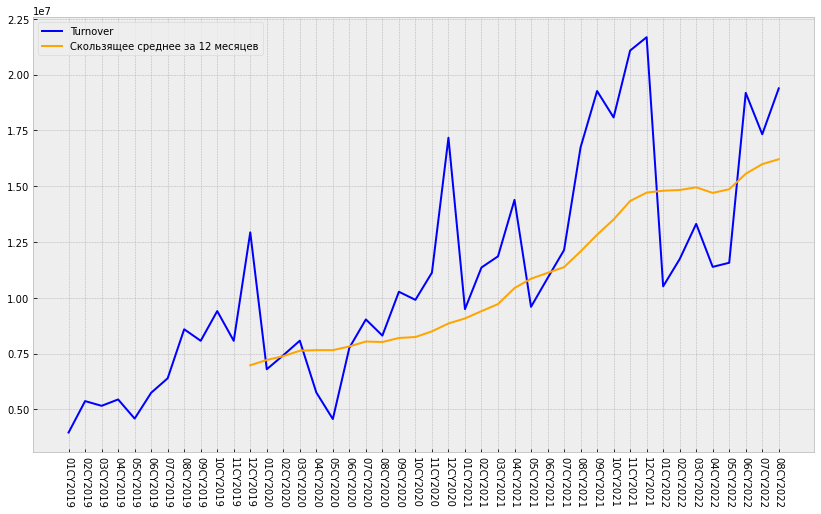

In [10]:
#X and Y axis inputs for Plotly graph. We use Scatter for line graphs
# plot_data = [
#     go.Scatter(
#         x=df_turnover_months['Month'],
#         y=df_turnover_months['Turnover'],
#     )
# ]

# plot_layout = go.Layout(
#         xaxis={"type": "category"},
#         title='Montly Revenue'
#     )
# fig = go.Figure(data=plot_data, layout=plot_layout)

# pyoff.iplot(fig)

with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = df_turnover_months['Month']#plt.axes()
#     best_mdl.plot_predict(1, len(series)+100, ax=ax)
    plt.plot(df_turnover_months['Month'],
             df_turnover_months['Turnover'] , color='blue', label='Turnover') #(1, len(series)+100, ax=ax)
    plt.plot(df_turnover_months['Turnover'].rolling(window = 12).mean(), label = 'Скользящее среднее за 12 месяцев', color = 'orange')
    plt.legend()
    plt.xticks (Rotation = -90)
    plt.show()

# строим график тренда и сезональности, используя statsmodels.tsa.seasonal seasonal_decompose

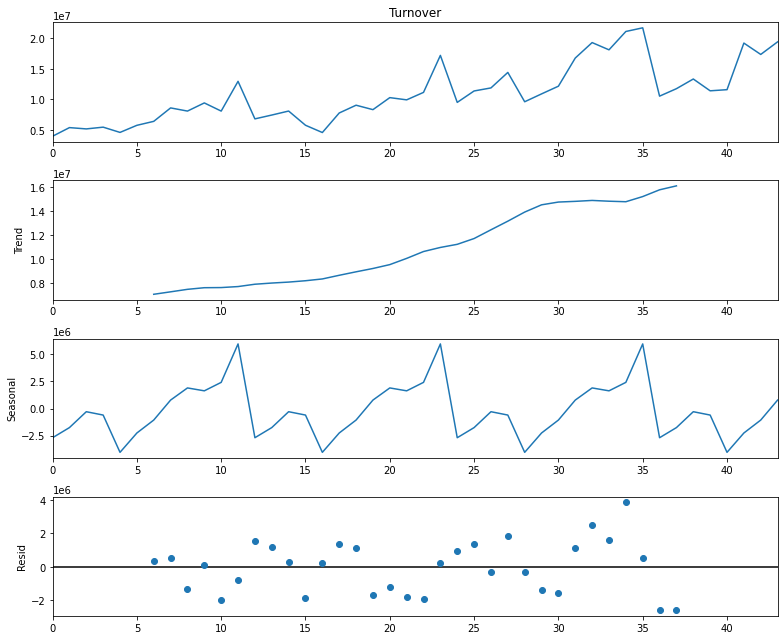

In [11]:
# импортируем функцию seasonal_decompose из statsmodels 
from statsmodels.tsa.seasonal import seasonal_decompose
 
# задаем размер графика
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
 
# применяем функцию к данным о перевозках
decompose = seasonal_decompose(df_turnover_months['Turnover'], period = 12)
decompose.plot()
 
plt.show()

# строим график процентного отношения оборота текущего месяца к предыдущему

<ipython-input-12-62642aeeb3f2>:28: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



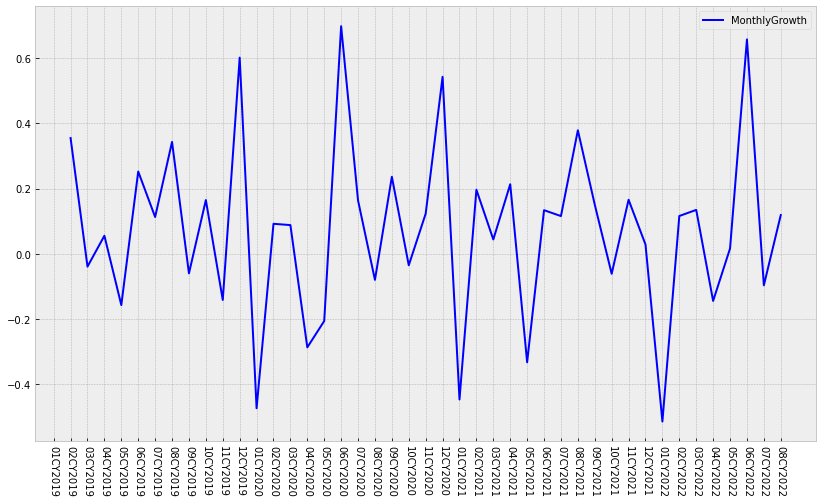

In [12]:
#using pct_change() function to see monthly percentage change
df_turnover_months['MonthlyGrowth'] = df_turnover_months['Turnover'].pct_change()

#showing first 5 rows
# df_turnover_months.head()

#visualization - line graph
# plot_data = [
#     go.Scatter(
#         x=df_turnover_months['Month'],
#         y=df_turnover_months['MonthlyGrowth'],
#     )
# ]

# plot_layout = go.Layout(
#         xaxis={"type": "category"},
#         title='Montly Growth Rate'
#     )

# fig = go.Figure(data=plot_data, layout=plot_layout)
# pyoff.iplot(fig)
with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = df_turnover_months['Month']#plt.axes()
#     best_mdl.plot_predict(1, len(series)+100, ax=ax)
    plt.plot(df_turnover_months['Month'],
             df_turnover_months['MonthlyGrowth'] , color='blue', label='MonthlyGrowth') 
    plt.xticks (Rotation = -90)
    plt.legend()
    plt.show()

очевидно, что пик продаж в декабре и самые маленькие продажи в мае

# ARIMA
исследуем временной ряд продаж


In [13]:
import pandas as pd
import numpy as np
import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from math import sqrt

import statsmodels.api as smapi

In [14]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)


In [15]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

In [16]:
import warnings
warnings.filterwarnings('ignore')

ищем лучшую модель ARIMA в зависимости о параметра order  
order tuple, optional  
The (p,d,q) order of the model for the autoregressive, differences, and moving average components

In [71]:
# import scipy.stats as scs
# series_box, lambda_1 = scs.boxcox(list(df_turnover_months['Turnover'])) # прибавляем единицу, так как в исходном ряде есть нули
# tsplot(series_box, lags=15)

aic: 1387.32102 | order: (1, 2, 1)
Results of Dickey-Fuller Test:
Test Statistic                 -4.545811
p-value                         0.000162
#Lags Used                      6.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


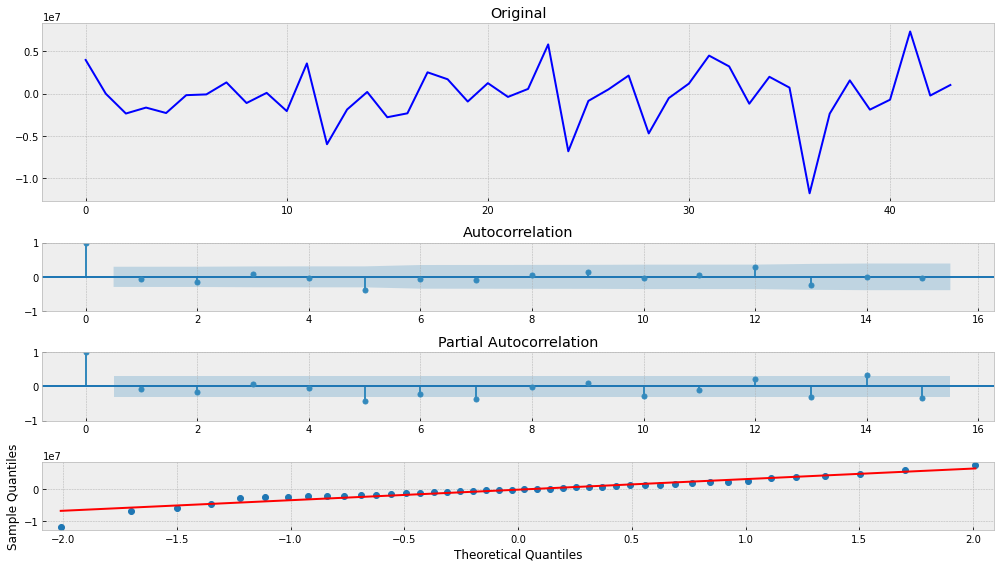

In [17]:
series = list(df_turnover_months['Turnover'])


# model = smapi.tsa.arima.ARIMA(train_data, order=(1,1,2))
# result = model.fit()

best_aic = np.inf 
best_order = None
best_mdl = None

for i in range(3):#7
    for d in range(3): #5
        for j in range(3):#5
             try:
                tmp_mdl = smt.ARIMA(series, order=(i,d,j)).fit()
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j) 
                    best_mdl = tmp_mdl
             except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))


tsplot(best_mdl.resid, lags=15)

In [18]:
from statsmodels.graphics.tsaplots import plot_predict

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [20]:

y = np.array(series) #оборот в месяц
X = range(len(y)) # месяц
X = np.array(X)
X = X.reshape(-1, 1) 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,  random_state = 42)

отрисуем интервалы и предсказания будущих периодов (3 месяца). Модель best_mdl


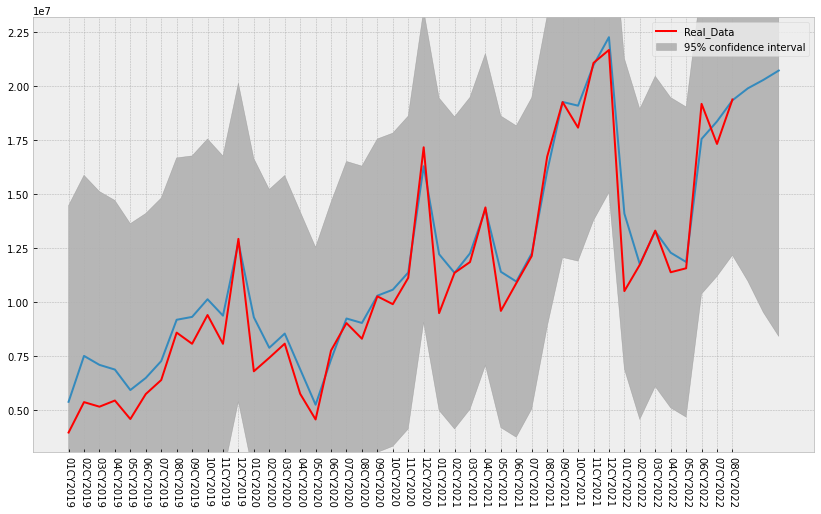

In [21]:
from statsmodels.graphics.tsaplots import plot_predict
# df_month_name = list(df_turnover_months['Month'])
# df_month_name.append( '09CY2022')#, '10CY2022','11CY2022')
# df_month_name.append( '10CY2022')
# df_month_name.append( '11CY2022')

with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
#     best_mdl.plot_predict(1, len(series)+100, ax=ax)
    plot_predict( best_mdl, 1, len(series)+3, ax=ax, label='predict')
    plt.plot(df_turnover_months['Month'], series, color='red', label='Real_Data')
#     plt.plot(series, color='blue', label='best_mdl')
    plt.xticks (Rotation = -90)
    plt.legend()
    plt.show()

# Модель экспоненциального сглаживания

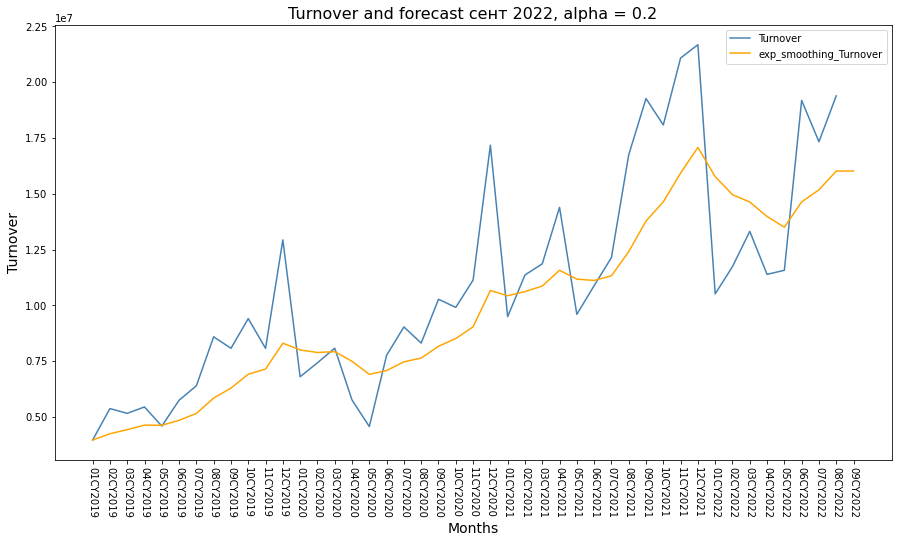

forecast сент 2022 16018818.631365735


In [22]:
# В модели экспоненциального сглаживания (exponential smoothing) или экспоненциального скользящего среднего 
# мы как раз (1) берем все предыдущие значения и (2) задаем каждому из наблюдений определенный вес и 
# (экспоненциально) уменьшаем этот вес по мере углубления в прошлое.
alpha = 0.2
 
# первое значение совпадает со значением временного ряда
# exp_smoothing = [births['Births'][0]]
exp_smoothing = [df_turnover_months['Turnover'][0]]
df_exp_months = [df_turnover_months['Month'][0]]
 
# в цикле for последовательно применяем формулу ко всем элементам ряда
for i in range(1, len(df_turnover_months['Month'])):
    exp_smoothing.append(alpha * df_turnover_months['Turnover'][i] + (1 - alpha) * exp_smoothing[i - 1])
    df_exp_months.append(df_turnover_months['Month'][i])
 
df_exp_months.append('09CY2022')
df_turnover_months['Exp_smoothing'] = exp_smoothing
# df_turnover_months.head(5)#['Exp_smoothing']


# зададим размер
plt.figure(figsize = (15,8))

forecast_turnover_exp = alpha * df_turnover_months['Turnover'][len(df_turnover_months['Month'])-1] + (1 - alpha) * exp_smoothing[len(df_turnover_months['Month']) - 2]
exp_smoothing.append(forecast_turnover_exp)
# выведем данные о рождаемости и кривую экспоненциального сглаживания
plt.plot(df_turnover_months['Month'], df_turnover_months['Turnover'], label = 'Turnover', color = 'steelblue')
# plt.plot(df_turnover_months['Exp_smoothing'], label = 'exp_smoothing_Turnover', color = 'orange')
plt.plot(df_exp_months, exp_smoothing, label = 'exp_smoothing_Turnover', color = 'orange')
 
# добавим легенду, ее положение на графике и размер шрифта
# plt.legend(title = '', loc = 'upper left', fontsize = 14)
# добавим подписи к осям и заголовки
plt.legend()
plt.ylabel('Turnover', fontsize = 14)
plt.xlabel('Months', fontsize = 14)
plt.title('Turnover and forecast сент 2022, alpha = ' + str(alpha), fontsize = 16)
plt.xticks (Rotation = -90)
 
plt.show()

print('forecast сент 2022' , exp_smoothing[-1])

# проанализируем количество клиентов каждый месяц, оборот которых больше clients_turnover_int каких-то едениц
# берем 2 тыс , т.к. это основные клиенты приносящие доход (оборот)

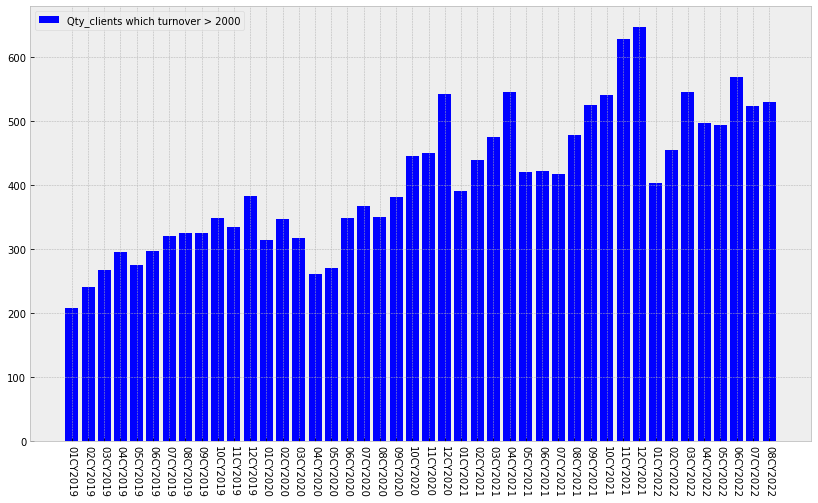

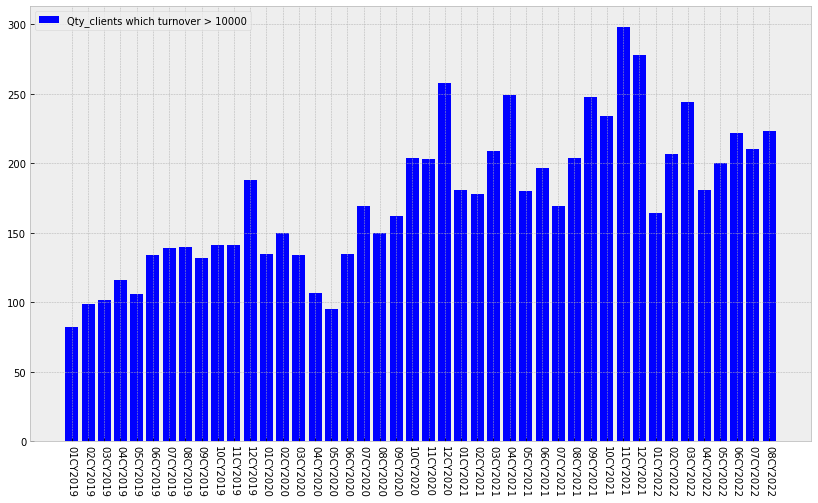

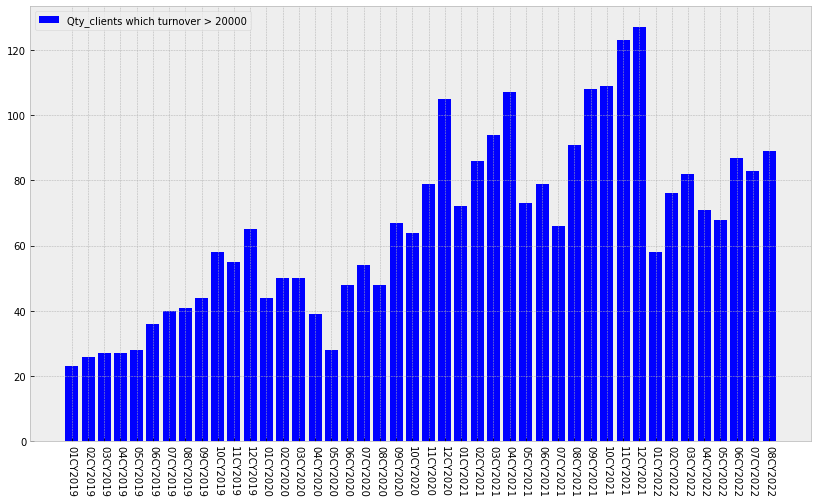

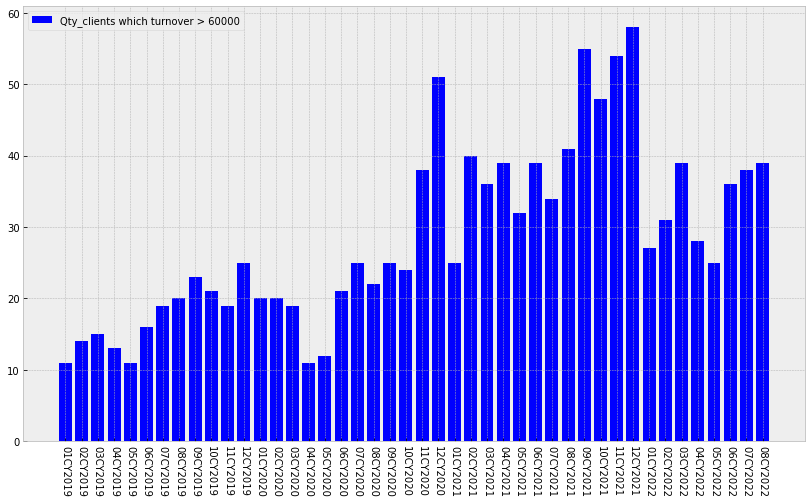

In [23]:
#количество клиентов каждый месяц

clients_turnover_list = [2000,10000,20000,60000]
# clients_turnover_int = 10000

for clients_turnover_int in clients_turnover_list:
    Qty_clients_list = []
    for i in df_columns[1:]:
        Qty_clients_list.append( df[i][ df[i] > clients_turnover_int].count() )

    # print(Qty_clients_list)

    df_Qty_clients_list = pd.Series(Qty_clients_list)
    df_Qty_clients_list.index = df_columns[1:]

    df_Qty_clients_list = pd.DataFrame({'Month':df_Qty_clients_list.index, 'Qty_clients':df_Qty_clients_list.values})
    with plt.style.context('bmh'):
        plt.figure(figsize=(14,8))
#         ax = df_Qty_clients_list['Month']#plt.axes()
        plt.bar(df_Qty_clients_list['Month'], df_Qty_clients_list['Qty_clients'] , color='blue', 
                label = 'Qty_clients which turnover > ' + str(clients_turnover_int)) 
        plt.xticks (Rotation = -90)
        plt.legend()
        plt.show()

#     plot_data = [
#         go.Bar(
#             x=df_Qty_clients_list['Month'],
#             y=df_Qty_clients_list['Qty_clients'],
#         )
#     ]

#     plot_layout = go.Layout(
#             xaxis={"type": "category"},
#             title='Qty_clients which turnover > ' + str(clients_turnover_int)
#         )

#     fig = go.Figure(data=plot_data, layout=plot_layout)
#     pyoff.iplot(fig)


здесь также видно, что кол-во клиентов максимально в декабре и минимально мае. 

Разделим всех клиентов на два типа : старые (Old_Client), которые покупают как минимум (qty_months_dont_buy+1) месяцев подряд
и не работающих (оборот менее sum_minimum_month)(Client_dont_work). Посмотрим как во времени эти параметры менялись

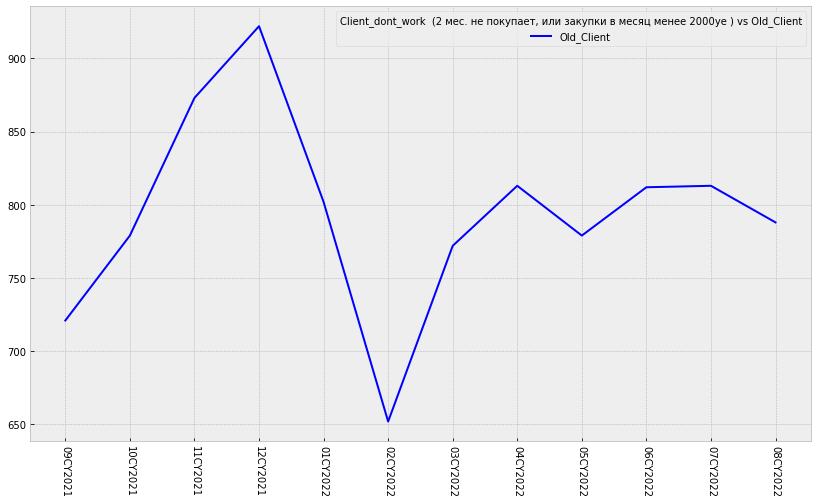

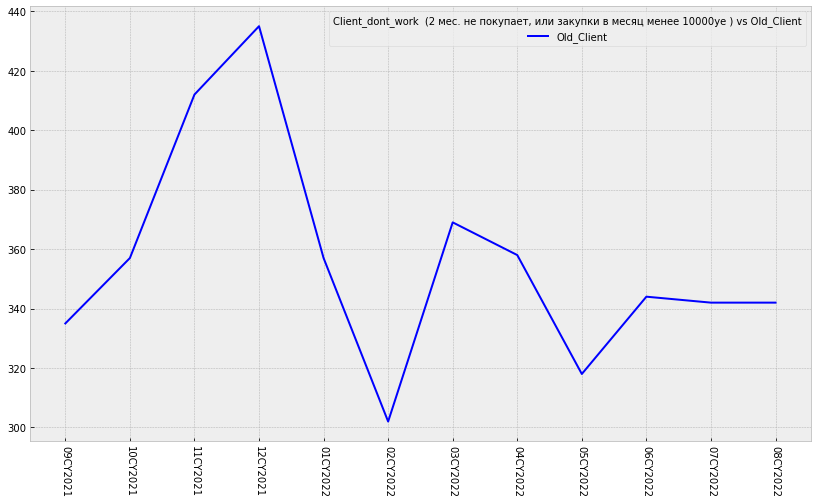

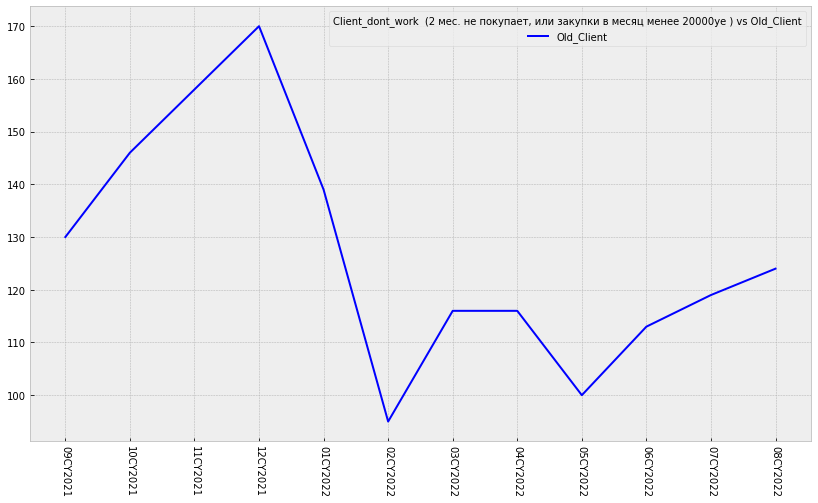

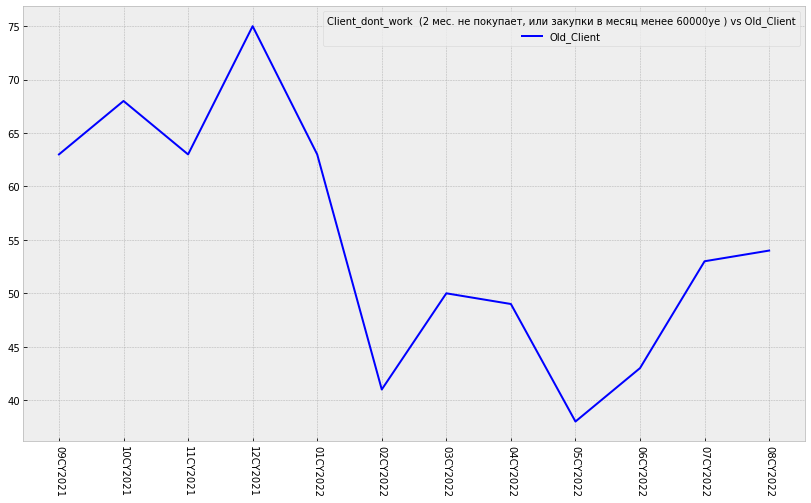

In [50]:
#строим график активных и неактивных клиентов по месяцам
df_new_client = pd.DataFrame({'Month':df_columns[1:]})
qty_months_dont_buy = 1
sum_minimum_month_list = [2000,10000,20000,60000]

for sum_minimum_month in sum_minimum_month_list:

    for index, row in df.iterrows():
        new_client = 0
        list_new_client = []
        for i in df_columns[1:]: 
            if row[i] > sum_minimum_month : 
                new_client = 0 #если есть оборот, то признак нового клиента обнуляем
            else : 
                new_client = new_client + 1
            if new_client > qty_months_dont_buy: #если клиент не берет более qty_months_dont_buy месяцев подряд, то это потенциально новый клиент. Или ушедший
                list_new_client.append('Client_dont_work')
            else :
                list_new_client.append('Old_Client')

        df_new_client[row['Клиент']] = list_new_client

    #транспонируем dataframe для удобства подсчета кол-в разных типов клиентов
    df_new_client_t = df_new_client.T.copy()
    df_new_client_t.columns = df_columns[1:]
    df_new_client_t = df_new_client_t.reset_index(drop=True)
    df_new_client_t.drop([0, 0], inplace = True)
    df_new_client_t.head()

    #считаем кол-ва активных и неактивных клиентов каждый месяц
    df_new_client_status = pd.DataFrame()
    df_new_client_status['Status'] = ['Client_dont_work', 'Old_Client']

    for i in df_columns[1:]:
        list_status_client = []
        list_status_client.append(df_new_client_t[df_new_client_t[i] == 'Client_dont_work'].count()[0])
        list_status_client.append(df_new_client_t[df_new_client_t[i] == 'Old_Client'].count()[0])
        df_new_client_status[i] = list_status_client

        
    with plt.style.context('bmh'):
        plt.figure(figsize=(14,8))
#         ax = df_Qty_clients_list['Month']#plt.axes()
        plt.plot(df_new_client_status.columns[2:], 
                 df_new_client_status[df_new_client_status['Status'] == 'Old_Client'].values.tolist()[0][2:] , color='blue', 
                label = 'Old_Client') 
#         plt.plot(df_new_client_status.columns[1:], 
#                  df_new_client_status[df_new_client_status['Status'] == 'Client_dont_work'].values.tolist()[0][1:] , color='red', 
#                 label = 'Client_dont_work') 
        plt.legend(title='Client_dont_work  (' + str(qty_months_dont_buy+1) + 
                     ' мес. не покупает, или закупки в месяц менее '+str(sum_minimum_month) + 'уе ) vs Old_Client')
        plt.locator_params(axis='x', nbins=10)
        plt.xticks (Rotation = -90)
        plt.show()        
        

#     plot_data = [
#         go.Scatter(
#             x=df_new_client_status.columns[1:],
#             y=df_new_client_status[df_new_client_status['Status'] == 'Old_Client'].values.tolist()[0][1:],
#             name = 'Old_Client'
#         ),
#         go.Scatter(
#             x=df_new_client_status.columns[1:],
#             y=df_new_client_status[df_new_client_status['Status'] == 'Client_dont_work'].values.tolist()[0][1:],
#             name = 'Client_dont_work'
#         )
#     ]

#     plot_layout = go.Layout(
#             xaxis={"type": "category"},
#             title='Client_dont_work vs Existing (' + str(qty_months_dont_buy+1) + 
#                     ' мес. не покупает, или закупки в месяц менее '+str(sum_minimum_month) + 'уе )'
#         )
#     fig = go.Figure(data=plot_data, layout=plot_layout)
#     pyoff.iplot(fig)

клиентская база средних клиентов (закупки хотя бы раз в два месяца и более 2 тыс н.у.) растет.
За два последних года с ~500 до 750. В пике было около 1000. В декабре этого года можно предполагать будет в районе 1200  

Крупных клиентов (оборот более 60 тыс у.е. в месяц) порядка 50.   
Обычно на такие обороты 5 клиентов на сейлс менеджера. Кол-во сейлс менеджеров, отвечающих за крупнх клиентов 10.

Средних клиентов (оборот от 20 до 60 тыс у.е.) 120-50 = 70 клиентов.
Здесь примерно 10 клиентов на одного сейлс менеджера. Итого на этот тип клиентов 7 сейлс менеджеров.

Клиентов с оборотом 10-20 тыс у.е. 350-120 = 230. 
Здесь примерно 20 клиентов на одного сейлс менеджера. Итого на этот тип клиентов 12 сейлс менеджеров.

Клиентов с оборотом 2-10 тыс у.е. 800-350 = 550. 
Здесь примерно 50 клиентов на одного сейлс менеджера. Итого на этот тип клиентов 11 сейлс менеджеров.

Клентов с оборотом менее 2 тыс у.е. обслуживает B2B.

Итого отдел продаж ориентировочно должен быть 40 человек на такие обороты
плюс
команда, поддерживающая B2B


In [24]:
from sklearn.linear_model import LogisticRegression

In [30]:
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

# model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

In [36]:
from sklearn.svm import SVC

# Список купных клиентов
подготовка данных для моделирования клиента с оборотом более 1000 кратного от минимального порога клиента в sum_minimum_month_list и которые делают не менее 50 кратного оборота sum_minimum_month_list каждый месяц (то есть нет провалов в продажах)

In [64]:
#оставим лишь период 12 месяцев : с июля
print(df_columns[33:44])

# df_original = df.copy()
df = df_original.copy()
df_columns = df.columns

for i_column in df_columns[1:32]:
    df.drop(i_column, axis=1, inplace=True)
df_columns = df.columns
df.head()

delete_clients = 0
delete_clients_index = []
for index, row in df.iterrows(): 
#         print(index)
#         print(sum(list(row)[1:]))
        if sum(list(row)[1:]) < 1000*sum_minimum_month_list[0] or len(list(filter(lambda x: x <= 50*sum_minimum_month_list[0], list(row)[1:]))) > 3:
            delete_clients = delete_clients + 1
            delete_clients_index.append(index)
#         break
print(delete_clients)

delete_clients_index[:20]

df = df.drop(delete_clients_index, axis=0)

df.shape

Index(['09CY2021', '10CY2021', '11CY2021', '12CY2021', '01CY2022', '02CY2022',
       '03CY2022', '04CY2022', '05CY2022', '06CY2022', '07CY2022'],
      dtype='object')
4044


(11, 14)

крупных клиентов, удовлетворяющих условиям выше равно 11

In [59]:
df.head()

,Клиент,08CY2021,09CY2021,10CY2021,11CY2021,12CY2021,01CY2022,02CY2022,03CY2022,04CY2022,05CY2022,06CY2022,07CY2022,08CY2022
161,Клиент161,412136.0,507903.4,436053.6,378526.0,396670.0,273464.6,223498.6,308674.6,210410.8,431993.0,1076463.6,935714.0,504819.2
165,Клиент165,231727.6,232713.4,251966.4,344500.4,294353.6,250091.4,234363.6,227718.0,226888.8,250708.2,346340.4,321314.8,323012.0
189,Клиент189,171882.0,121394.6,130606.4,107391.4,114036.6,82716.8,95354.2,125649.2,83538.8,163011.0,347683.6,299542.0,345052.4
283,Клиент283,279897.8,347215.4,328284.6,297269.0,344491.2,171237.2,221324.4,22070.4,155382.4,138966.2,173792.4,195188.4,236480.8
1033,Клиент1033,1591259.0,1083209.2,1731999.6,2334149.6,1228845.0,903092.8,904670.6,255768.0,773544.0,603977.6,1469076.8,1121297.8,2456967.2


# получился список крупных клиента. Для каждого из них построим свою модель Arima. Получим словарь {Клиент:Модель}

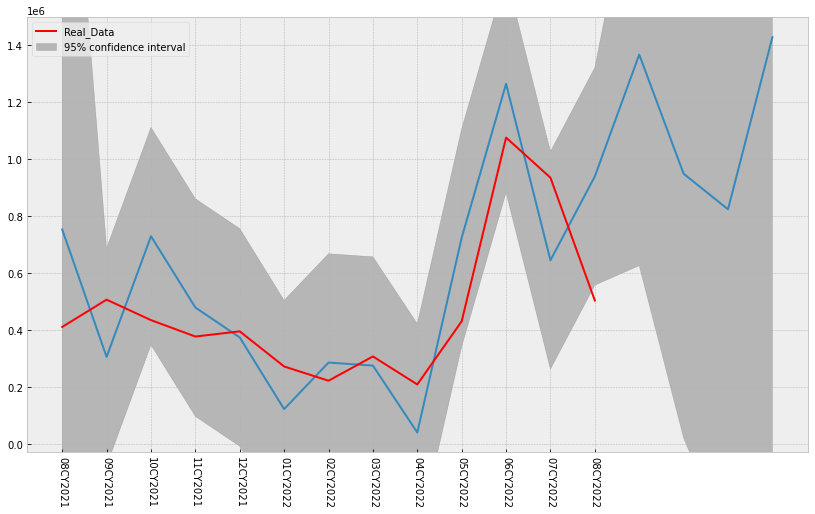

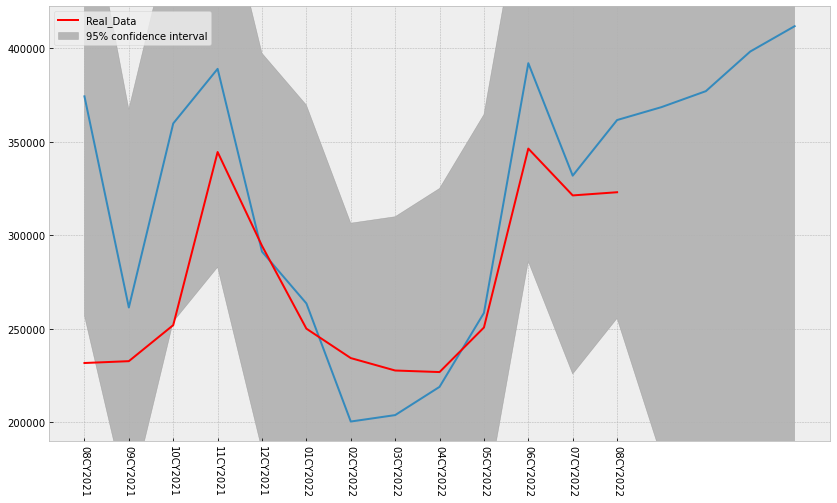

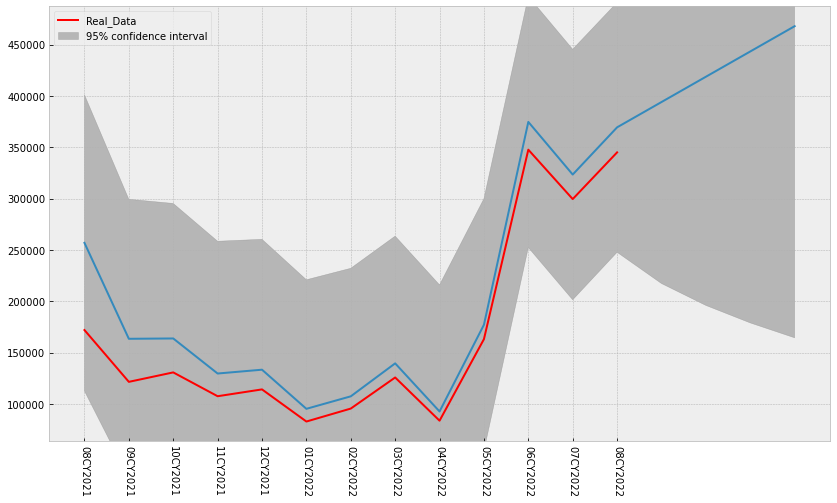

In [68]:
# from statsmodels.tsa.arima_model import ARIMA
num_of_itter = 0
num_of_clients = 3 #кол-во киентов, которых хотим увидеть на графике. 
dic_client_Arima = {}
# list_sept_nov = ['09CY22','10CY22','11CY22']
for index, row in df.iterrows():
#     print(list(row)[1:])
    period_length = list(row)
    train = row
    best_aic = np.inf 
    best_order = None
    best_mdl = None
    for i in range(3):#7
        for d in range(3): #5
            for j in range(3):#5
                 try:
                    tmp_mdl = smt.ARIMA(list(row)[1:], order=(i,d,j)).fit()
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j) 
                        best_mdl = tmp_mdl
                 except: continue
                    
    dic_client_Arima[list(row)[0]]  = best_mdl
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(14,8))
        ax = plt.axes()
        plot_predict( best_mdl, 1, len(period_length) + 3, ax=ax, label='predict')
        plt.plot(df_turnover_months['Month'][31:], list(row)[1:], color='red', label='Real_Data')
        plt.xticks (Rotation = -90)
        plt.legend()
        plt.show()
    num_of_itter = num_of_itter + 1
    if num_of_itter >= num_of_clients :  
#         continue 
        break



In [69]:
#предсказание оборота Клиента161 на 3 месяца вперед
dic_client_Arima['Клиент161'].predict(len(list(row)[1:]),len(list(row)[1:])+3)

array([ 940406.96797489, 1367711.46443996,  949658.94718948,
        824878.32766217])

# SSA
сингулярный анализ. попробуем разложить продажи на составляющие

In [70]:
def X_to_TS(X_i):
    """Averages the anti-diagonals of the given elementary matrix, X_i, and returns a time series."""
    # Reverse the column ordering of X_i
    X_rev = X_i[::-1]
    # Full credit to Mark Tolonen at https://stackoverflow.com/a/6313414 for this one:
    return np.array([X_rev.diagonal(i).mean() for i in range(-X_i.shape[0]+1, X_i.shape[1])])

In [71]:
from cycler import cycler

выберем крупных клиентов, у которых суммарный оборот за весь период более 1000*sum_minimum_month_list[0] и кол-во месяцев,  
где оборот был менее 20*sum_minimum_month_list[0] не более трех.  
Таких клиентов 8

In [72]:
df = df_original.copy()
df_columns = df.columns

delete_clients = 0
delete_clients_index = []
for index, row in df.iterrows(): 
        if sum(list(row)[1:]) < 1000*sum_minimum_month_list[0] or len(list(filter(lambda x: x <= 20*sum_minimum_month_list[0], list(row)[1:]))) > 3:
            delete_clients = delete_clients + 1
            delete_clients_index.append(index)
print(delete_clients)

delete_clients_index[:20]

df = df.drop(delete_clients_index, axis=0)

df.shape

4047


(8, 45)

In [73]:
Clients_turnover_list = []
for index, row in df.iterrows():
#     print(list(row))
    Clients_turnover_list.append(list(row)[1:])
    

Разложим продажи клиента, идущего первым в списке на 8 составляющих

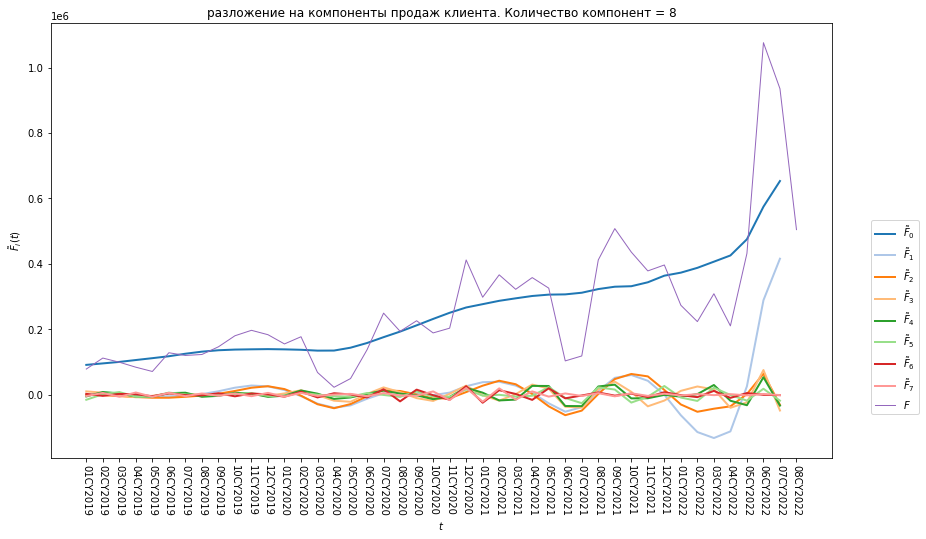

In [74]:
F = Clients_turnover_list[0]
N = 43
L = 8 # The window length.
K = N - L + 1 # The number of columns in the trajectory matrix.
# Create the trajectory matrix by pulling the relevant subseries of F, and stacking them as columns.

X = np.column_stack([F[i:i+L] for i in range(0,K)])
# Note: the i+L above gives us up to i+L-1, as numpy array upper bounds are exclusive.

d = np.linalg.matrix_rank(X) # The intrinsic dimensionality of the trajectory space.

# For those interested in how to code up an SVD calculation, Numerical Recipes in Fortran 77
# has you covered: http://www.aip.de/groups/soe/local/numres/bookfpdf/f2-6.pdf
# Thankfully, we'll leave the actual SVD calculation to NumPy.
U, Sigma, V = np.linalg.svd(X)
V = V.T # Note: the SVD routine returns V^T, not V, so I'll tranpose it back here. This may seem pointless, 
# but I'll treat the Python representation of V consistently with the mathematical notation in this notebook.

# Calculate the elementary matrices of X, storing them in a multidimensional NumPy array.
# This requires calculating sigma_i * U_i * (V_i)^T for each i, or sigma_i * outer_product(U_i, V_i). 
# Note that Sigma is a 1D array of singular values, instead of the full L x K diagonal matrix.
X_elem = np.array( [Sigma[i] * np.outer(U[:,i], V[:,i]) for i in range(0,d)] )

# Quick sanity check: the sum of all elementary matrices in X_elm should be equal to X, to within a 
# *very small* tolerance:
if not np.allclose(X, X_elem.sum(axis=0), atol=1e-10):
    print("WARNING: The sum of X's elementary matrices is not equal to X!")
    
#построим первые n элементарных компонентов,  𝐹̃ 𝑖 , для временного ряда.
n = min(12,d) # In case of noiseless time series with d < n.

# Fiddle with colour cycle - need more colours!
plt.figure(figsize=(14,8))
fig = plt.subplot()
color_cycle = cycler(color=plt.get_cmap('tab20').colors)
fig.axes.set_prop_cycle(color_cycle)

# Convert elementary matrices straight to a time series - no need to construct any Hankel matrices.
for i in range(n):
    F_i = X_to_TS(X_elem[i])
    fig.axes.plot(F_i, lw=2)

fig.axes.plot(df_turnover_months['Month'], F, alpha=1, lw=1)
fig.set_xlabel("$t$")
fig.set_ylabel(r"$\tilde{F}_i(t)$")
legend = [r"$\tilde{F}_{%s}$" %i for i in range(n)] + ["$F$"]
fig.set_title("разложение на компоненты продаж клиента. Количество компонент = " + str(L))
plt.xticks (Rotation = -90)
fig.legend(legend, loc=(1.05,0.1));

можно предположить, что 0 и 1 компонента - это тренд, 2,3 - периодичность номер 1  
4 и 5 компонента - периодичность номер 2  
6 и далее - это шум

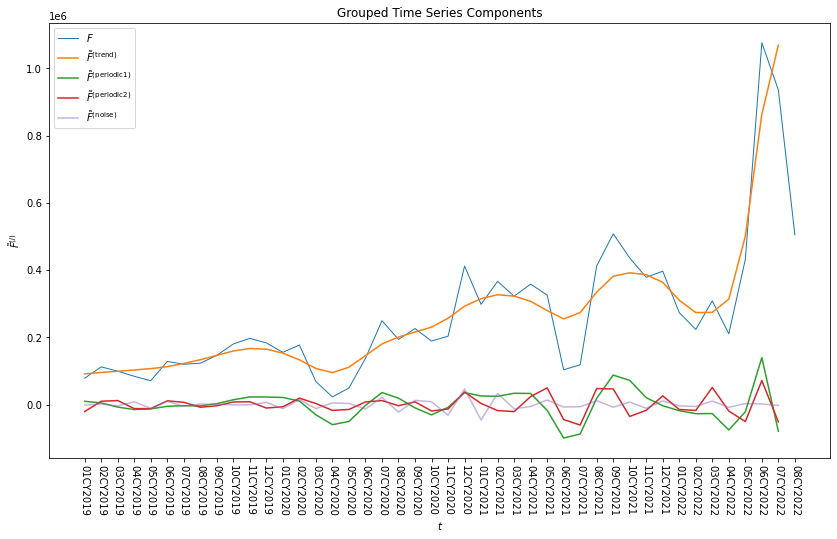

<Figure size 792x648 with 0 Axes>

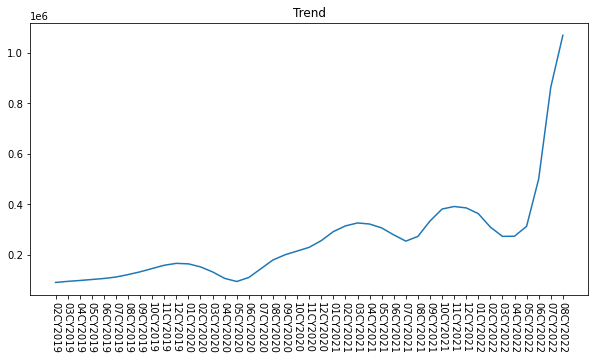

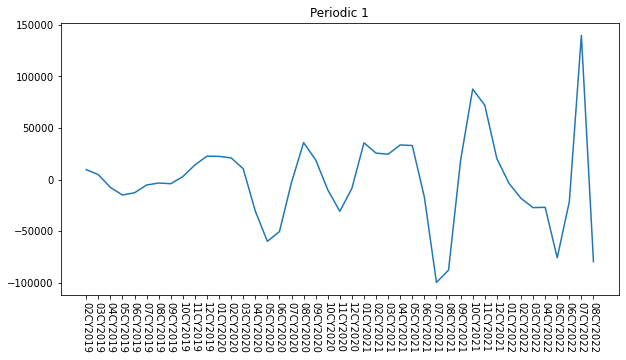

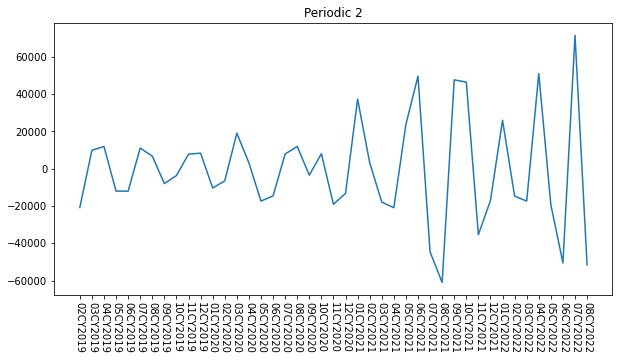

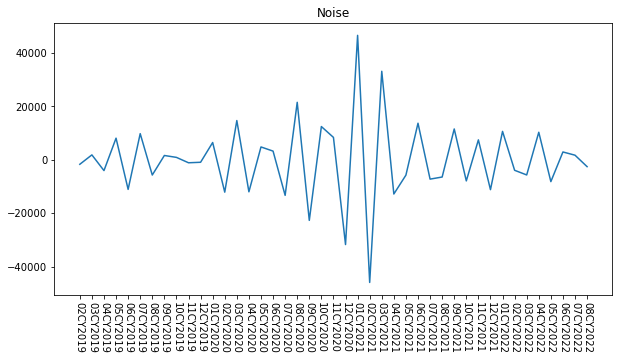

In [75]:
# Assemble the grouped components of sales.
F_trend = X_to_TS(X_elem[[0,1]].sum(axis=0))
F_periodic1 = X_to_TS(X_elem[[2,3]].sum(axis=0))
F_periodic2 = X_to_TS(X_elem[[4,5]].sum(axis=0))
F_noise = X_to_TS(X_elem[6:].sum(axis=0))

# Plot the sales of client and its separated components on a single plot.
plt.figure(figsize=(14,8))
plt.plot(df_turnover_months['Month'],F, lw=1)
plt.plot(F_trend)
plt.plot(F_periodic1)
plt.plot(F_periodic2)
plt.plot(F_noise, alpha=0.5)
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}^{(j)}$")
groups = ["trend", "periodic 1", "periodic 2", "noise"]
legend = ["$F$"] + [r"$\tilde{F}^{(\mathrm{%s})}$"%group for group in groups]
plt.legend(legend)
plt.title("Grouped Time Series Components")
plt.xticks (Rotation = -90)
plt.show()

# A list of tuples so we can create the next plot with a loop.
components = [('Trend', F_trend), 
              ('Periodic 1', F_periodic1),
              ('Periodic 2', F_periodic2),
              ('Noise', F_noise)]

# Plot the separated components and original components together.
fig = plt.figure()
n=1
for name, ssa_comp in components:    
#     ax = fig.add_subplot(2,2,n)
#     ax.plot(df_turnover_months['Month'][1:], ssa_comp)
    plt.figure(figsize=(10,5))
    plt.plot(df_turnover_months['Month'][1:], ssa_comp)
    plt.xticks (Rotation = -90)
    plt.title(name)
#     ax.set_title(name, fontsize=16)
#     ax.set_xticks([])
    n += 1
    plt.show()

fig.tight_layout()

In [76]:
#построим w-корреляционную матрицу для временного ряда продаж клиента
# Get the weights w first, as they'll be reused a lot.
# Note: list(np.arange(L)+1) returns the sequence 1 to L (first line in definition of w), 
# [L]*(K-L-1) repeats L K-L-1 times (second line in w definition)
# list(np.arange(L)+1)[::-1] reverses the first list (equivalent to the third line)
# Add all the lists together and we have our array of weights.
w = np.array(list(np.arange(L)+1) + [L]*(K-L-1) + list(np.arange(L)+1)[::-1])

# Get all the components of the toy series, store them as columns in F_elem array.
F_elem = np.array([X_to_TS(X_elem[i]) for i in range(d)])

# Calculate the individual weighted norms, ||F_i||_w, first, then take inverse square-root so we don't have to later.
F_wnorms = np.array([w.dot(F_elem[i]**2) for i in range(d)])
F_wnorms = F_wnorms**-0.5

# Calculate the w-corr matrix. The diagonal elements are equal to 1, so we can start with an identity matrix
# and iterate over all pairs of i's and j's (i != j), noting that Wij = Wji.
Wcorr = np.identity(d)
for i in range(d):
    for j in range(i+1,d):
        Wcorr[i,j] = abs(w.dot(F_elem[i]*F_elem[j]) * F_wnorms[i] * F_wnorms[j])
        Wcorr[j,i] = Wcorr[i,j]

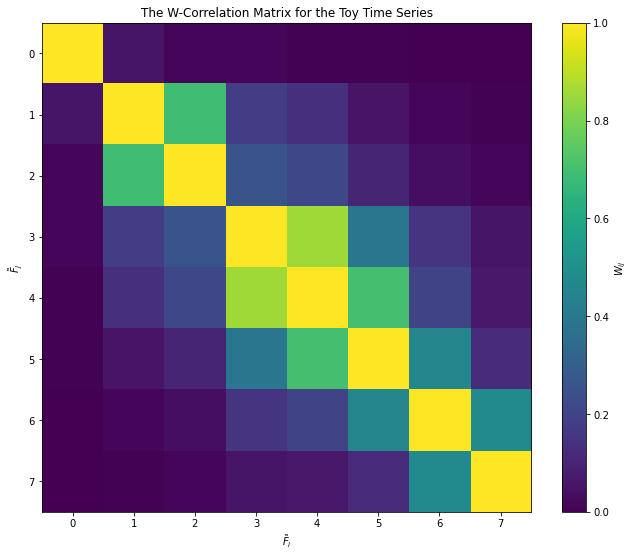

In [77]:
#График w-корреляционной матрицы.
ax = plt.imshow(Wcorr)
plt.xlabel(r"$\tilde{F}_i$")
plt.ylabel(r"$\tilde{F}_j$")
plt.colorbar(ax.colorbar, fraction=0.045)
ax.colorbar.set_label("$W_{ij}$")
plt.clim(0,1)
plt.title("The W-Correlation Matrix for the Toy Time Series");

в принципе по матрице можно сказать, что допустимо объеденить 1 и 2 компонент, 3-6 компонент и 7-8 компонент

In [78]:
# соберем код SSA в удобный класс, образно названный SSA
class SSA(object):
    
    __supported_types = (pd.Series, np.ndarray, list)
    
    def __init__(self, tseries, L, save_mem=True):
        """
        Decomposes the given time series with a singular-spectrum analysis. Assumes the values of the time series are
        recorded at equal intervals.
        
        Parameters
        ----------
        tseries : The original time series, in the form of a Pandas Series, NumPy array or list. 
        L : The window length. Must be an integer 2 <= L <= N/2, where N is the length of the time series.
        save_mem : Conserve memory by not retaining the elementary matrices. Recommended for long time series with
            thousands of values. Defaults to True.
        
        Note: Even if an NumPy array or list is used for the initial time series, all time series returned will be
        in the form of a Pandas Series or DataFrame object.
        """
        
        # Tedious type-checking for the initial time series
        if not isinstance(tseries, self.__supported_types):
            raise TypeError("Unsupported time series object. Try Pandas Series, NumPy array or list.")
        
        # Checks to save us from ourselves
        self.N = len(tseries)
        if not 2 <= L <= self.N/2:
            raise ValueError("The window length must be in the interval [2, N/2].")
        
        self.L = L
        self.orig_TS = pd.Series(tseries)
        self.K = self.N - self.L + 1
        
        # Embed the time series in a trajectory matrix
        self.X = np.array([self.orig_TS.values[i:L+i] for i in range(0, self.K)]).T
        
        # Decompose the trajectory matrix
        self.U, self.Sigma, VT = np.linalg.svd(self.X)
        self.d = np.linalg.matrix_rank(self.X)
        
        self.TS_comps = np.zeros((self.N, self.d))
        
        if not save_mem:
            # Construct and save all the elementary matrices
            self.X_elem = np.array([ self.Sigma[i]*np.outer(self.U[:,i], VT[i,:]) for i in range(self.d) ])

            # Diagonally average the elementary matrices, store them as columns in array.           
            for i in range(self.d):
                X_rev = self.X_elem[i, ::-1]
                self.TS_comps[:,i] = [X_rev.diagonal(j).mean() for j in range(-X_rev.shape[0]+1, X_rev.shape[1])]
            
            self.V = VT.T
        else:
            # Reconstruct the elementary matrices without storing them
            for i in range(self.d):
                X_elem = self.Sigma[i]*np.outer(self.U[:,i], VT[i,:])
                X_rev = X_elem[::-1]
                self.TS_comps[:,i] = [X_rev.diagonal(j).mean() for j in range(-X_rev.shape[0]+1, X_rev.shape[1])]
            
            self.X_elem = "Re-run with save_mem=False to retain the elementary matrices."
            
            # The V array may also be very large under these circumstances, so we won't keep it.
            self.V = "Re-run with save_mem=False to retain the V matrix."
        
        # Calculate the w-correlation matrix.
        self.calc_wcorr()
            
    def components_to_df(self, n=0):
        """
        Returns all the time series components in a single Pandas DataFrame object.
        """
        if n > 0:
            n = min(n, self.d)
        else:
            n = self.d
        
        # Create list of columns - call them F0, F1, F2, ...
        cols = ["F{}".format(i) for i in range(n)]
        return pd.DataFrame(self.TS_comps[:, :n], columns=cols, index=self.orig_TS.index)
            
    
    def reconstruct(self, indices):
        """
        Reconstructs the time series from its elementary components, using the given indices. Returns a Pandas Series
        object with the reconstructed time series.
        
        Parameters
        ----------
        indices: An integer, list of integers or slice(n,m) object, representing the elementary components to sum.
        """
        if isinstance(indices, int): indices = [indices]
        
        ts_vals = self.TS_comps[:,indices].sum(axis=1)
        return pd.Series(ts_vals, index=self.orig_TS.index)
    
    def calc_wcorr(self):
        """
        Calculates the w-correlation matrix for the time series.
        """
             
        # Calculate the weights
        w = np.array(list(np.arange(self.L)+1) + [self.L]*(self.K-self.L-1) + list(np.arange(self.L)+1)[::-1])
        
        def w_inner(F_i, F_j):
            return w.dot(F_i*F_j)
        
        # Calculated weighted norms, ||F_i||_w, then invert.
        F_wnorms = np.array([w_inner(self.TS_comps[:,i], self.TS_comps[:,i]) for i in range(self.d)])
        F_wnorms = F_wnorms**-0.5
        
        # Calculate Wcorr.
        self.Wcorr = np.identity(self.d)
        for i in range(self.d):
            for j in range(i+1,self.d):
                self.Wcorr[i,j] = abs(w_inner(self.TS_comps[:,i], self.TS_comps[:,j]) * F_wnorms[i] * F_wnorms[j])
                self.Wcorr[j,i] = self.Wcorr[i,j]
    
    def plot_wcorr(self, min=None, max=None):
        """
        Plots the w-correlation matrix for the decomposed time series.
        """
        if min is None:
            min = 0
        if max is None:
            max = self.d
        
        if self.Wcorr is None:
            self.calc_wcorr()
        
        ax = plt.imshow(self.Wcorr)
        plt.xlabel(r"$\tilde{F}_i$")
        plt.ylabel(r"$\tilde{F}_j$")
        plt.colorbar(ax.colorbar, fraction=0.045)
        ax.colorbar.set_label("$W_{i,j}$")
        plt.clim(0,1)
        
        # For plotting purposes:
        if max == self.d:
            max_rnge = self.d-1
        else:
            max_rnge = max
        
        plt.xlim(min-0.5, max_rnge+0.5)
        plt.ylim(max_rnge+0.5, min-0.5)
        

# L = 2

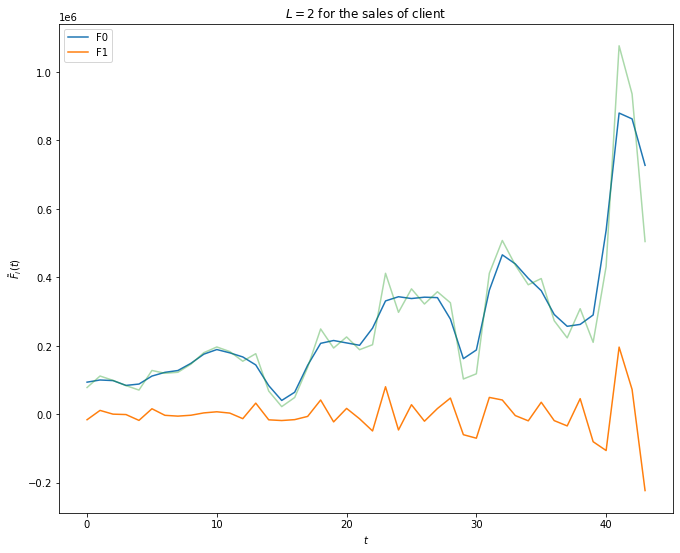

In [79]:
F_ssa_L2 = SSA(F, 2)
F_ssa_L2.components_to_df().plot()
F_ssa_L2.orig_TS.plot(alpha=0.4)
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}_i(t)$")
plt.title(r"$L=2$ for the sales of client");

# L = 5

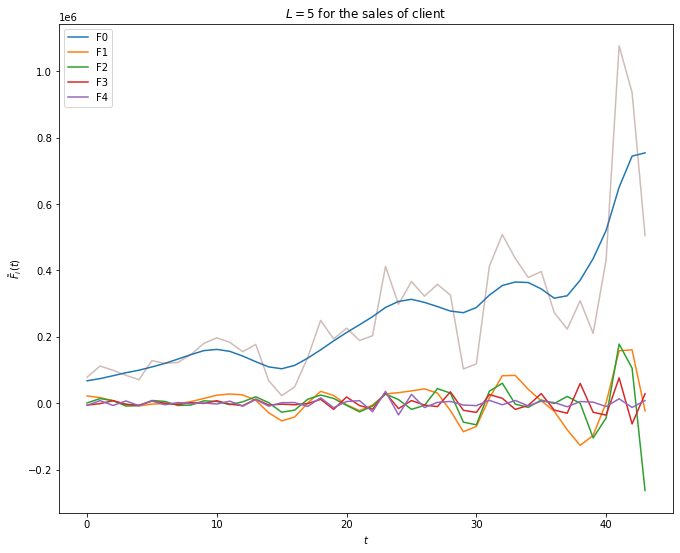

In [80]:
F_ssa_L5 = SSA(F, 5)
F_ssa_L5.components_to_df().plot()
F_ssa_L5.orig_TS.plot(alpha=0.4)
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}_i(t)$")
plt.title(r"$L=5$ for the sales of client");
plt.show()

# L = 6

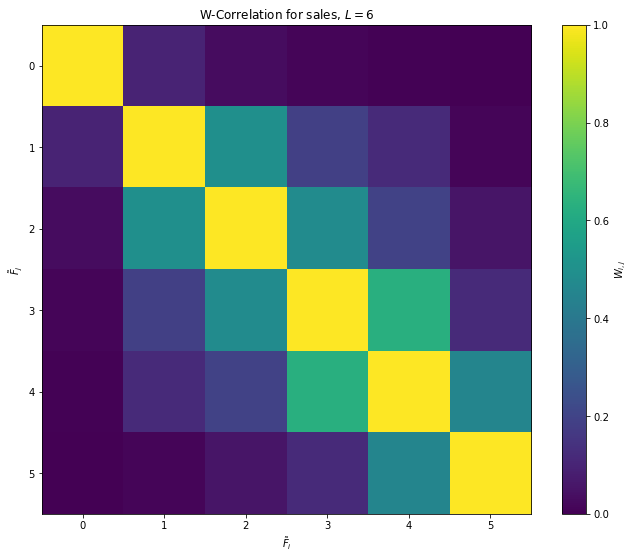

In [81]:
F_ssa_L6 = SSA(F, 6)
F_ssa_L6.plot_wcorr()
plt.title("W-Correlation for sales, $L=6$");

w-корреляционная матрица для  𝐿=6  разбита (грубо) на три блока:  𝐹̃ 0, 𝐹̃1 to 𝐹̃4  и  𝐹̃5 . Внутри этих блоков размер значений  𝑊𝑖,𝑗  предполагает, что нам нужно сгруппировать  𝐹̃ 1 ,  𝐹̃ 2 ,  𝐹̃ 3, F4

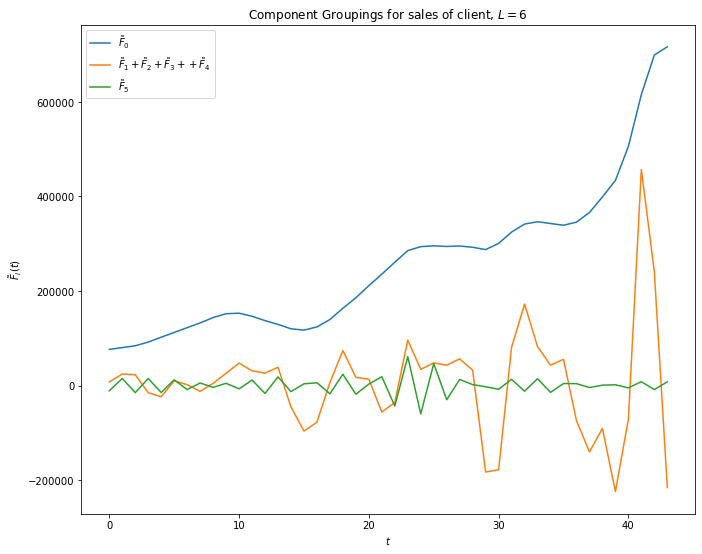

In [82]:
F_ssa_L6.reconstruct(0).plot()
F_ssa_L6.reconstruct([1,2,3,4]).plot()
F_ssa_L6.reconstruct([5,5]).plot()
# F_ssa_L20.reconstruct(3).plot()
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}_i(t)$")
plt.title("Component Groupings for sales of client, $L=6$");
plt.legend([r"$\tilde{F}_0$", 
            r"$\tilde{F}_1+\tilde{F}_2+\tilde{F}_3++\tilde{F}_4$", 
            r"$\tilde{F}_5$"])

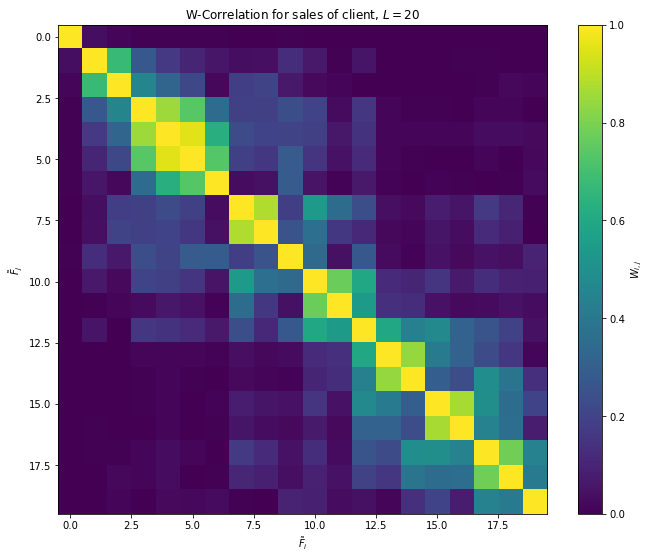

In [83]:
F_ssa_L20 = SSA(F, 20)
F_ssa_L20.plot_wcorr()
plt.title("W-Correlation for sales of client, $L=20$");

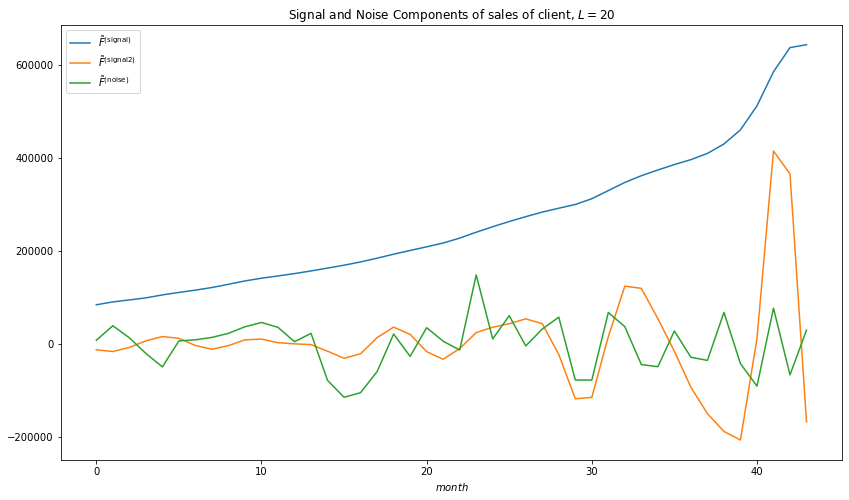

In [163]:
# F_ssa_L20.reconstruct(0).plot()
# F_ssa_L20.reconstruct(slice(0,7)).plot()
# F_ssa_L20.reconstruct(slice(7,20)).plot()
plt.figure(figsize=(14,8))
plt.plot(F_ssa_L20.reconstruct(0))
plt.plot(F_ssa_L20.reconstruct(slice(1,4)))
plt.plot(F_ssa_L20.reconstruct(slice(4,20)))

plt.legend([r"$\tilde{F}^{\mathrm{(signal)}}$", r"$\tilde{F}^{\mathrm{(signal2)}}$", r"$\tilde{F}^{\mathrm{(noise)}}$"])
plt.title("Signal and Noise Components of sales of client, $L = 20$")
plt.xlabel(r"$month$");
plt.show()

# Нейронные сети  (прогноз оборота клиента в отдельности и компании в целом)

In [85]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [86]:
df = df_original.copy()
df_columns = df.columns

In [87]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error

In [88]:
# dataset = pd.DataFrame()
# dataset['Month'] = np.arange(len(F)) + 1
# dataset['Turnover'] = pd.DataFrame(F) #F = Clients_turnover_list[0]
dataset = pd.DataFrame(F)

In [89]:
print('min = ' + str(dataset[0].min()))
print('max = ' + str(dataset[0].max()))
print('mean = ' + str(dataset[0].mean()))

min = 22673.0
max = 1076463.6
mean = 263537.8636363636


In [589]:
# dataset[0]

Оборот разбиваем по критерям. Нам важно предсказать диапазон оборота

In [90]:
Y = dataset[0]
criteria = [Y <= 200, Y.between(200, 100000), Y.between(100000, 200000), Y.between(200000, 300000), 
                Y.between(300000, 400000), Y.between(400000, 500000), Y.between(500000, 600000),
                Y.between(600000, 700000), Y.between(700000, 800000), Y.between(800000, 900000),
                Y >= 900000]
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Y = np.select(criteria, values, 0)

dataset[0] = Y

In [91]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

делим на тестовую и train выборки

In [92]:
#каждый третий месяц на тест
test_ind_list = []
train_ind_list = []
for i in range(len(dataset)):
    if i % 3 == 0 :
        test_ind_list.append(i)
    else:
        train_ind_list.append(i)
        
print(len(train_ind_list), len(test_ind_list))

29 15


In [93]:
train, test = dataset[train_ind_list,:], dataset[test_ind_list,:]
print(len(train_ind_list), len(test_ind_list))

29 15


In [94]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [95]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [96]:
# # reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [97]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
27/27 - 3s - loss: 0.1051 - 3s/epoch - 127ms/step
Epoch 2/100
27/27 - 0s - loss: 0.0903 - 103ms/epoch - 4ms/step
Epoch 3/100
27/27 - 0s - loss: 0.0785 - 94ms/epoch - 3ms/step
Epoch 4/100
27/27 - 0s - loss: 0.0701 - 91ms/epoch - 3ms/step
Epoch 5/100
27/27 - 0s - loss: 0.0617 - 110ms/epoch - 4ms/step
Epoch 6/100
27/27 - 0s - loss: 0.0560 - 105ms/epoch - 4ms/step
Epoch 7/100
27/27 - 0s - loss: 0.0524 - 104ms/epoch - 4ms/step
Epoch 8/100
27/27 - 0s - loss: 0.0487 - 114ms/epoch - 4ms/step
Epoch 9/100
27/27 - 0s - loss: 0.0465 - 108ms/epoch - 4ms/step
Epoch 10/100
27/27 - 0s - loss: 0.0449 - 107ms/epoch - 4ms/step
Epoch 11/100
27/27 - 0s - loss: 0.0438 - 109ms/epoch - 4ms/step
Epoch 12/100
27/27 - 0s - loss: 0.0432 - 108ms/epoch - 4ms/step
Epoch 13/100
27/27 - 0s - loss: 0.0424 - 106ms/epoch - 4ms/step
Epoch 14/100
27/27 - 0s - loss: 0.0420 - 113ms/epoch - 4ms/step
Epoch 15/100
27/27 - 0s - loss: 0.0423 - 115ms/epoch - 4ms/step
Epoch 16/100
27/27 - 0s - loss: 0.0413 - 128ms/epoch

In [98]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.44 RMSE
Test Score: 1.27 RMSE


данного клиента предсказали с точностью до 1.4 диапазона. У нас 1 диапазон =100 000, т.е. с точностью 140000 уе.
Т.к. данный клиент заведомо большой и оборот в районе 1 млн, то точность <14%

# посмотрим на оборот компании в целом

In [99]:
dataset = pd.DataFrame(df_turnover_months['Turnover'])
# dataset

In [100]:
print('min = ' + str(dataset['Turnover'].min()))
print('max = ' + str(dataset['Turnover'].max()))
print('mean = ' + str(dataset['Turnover'].mean()))

min = 3965687.0
max = 21680715.799999997
mean = 10932511.518181818


In [101]:
Y = dataset['Turnover']
criteria = [Y <= 5000000, Y.between(5000000, 7000000), Y.between(7000000, 9000000), Y.between(9000000, 11000000), 
                Y.between(11000000, 13000000), Y.between(13000000, 15000000), Y.between(15000000, 17000000),
                Y.between(17000000, 19000000), Y.between(19000000, 21000000), Y >= 21000000]
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Y = np.select(criteria, values, 0)

dataset['Turnover'] = Y

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

#каждый третий месяц на тест
test_ind_list = []
train_ind_list = []
for i in range(len(dataset)):
    if i % 3 == 0 :
        test_ind_list.append(i)
    else:
        train_ind_list.append(i)
        
print(len(train_ind_list), len(test_ind_list))

train, test = dataset[train_ind_list,:], dataset[test_ind_list,:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# # reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

29 15
Epoch 1/100
27/27 - 4s - loss: 0.2165 - 4s/epoch - 154ms/step
Epoch 2/100
27/27 - 0s - loss: 0.1831 - 104ms/epoch - 4ms/step
Epoch 3/100
27/27 - 0s - loss: 0.1534 - 105ms/epoch - 4ms/step
Epoch 4/100
27/27 - 0s - loss: 0.1291 - 95ms/epoch - 4ms/step
Epoch 5/100
27/27 - 0s - loss: 0.1100 - 91ms/epoch - 3ms/step
Epoch 6/100
27/27 - 0s - loss: 0.0942 - 108ms/epoch - 4ms/step
Epoch 7/100
27/27 - 0s - loss: 0.0837 - 99ms/epoch - 4ms/step
Epoch 8/100
27/27 - 0s - loss: 0.0743 - 107ms/epoch - 4ms/step
Epoch 9/100
27/27 - 0s - loss: 0.0680 - 110ms/epoch - 4ms/step
Epoch 10/100
27/27 - 0s - loss: 0.0633 - 94ms/epoch - 3ms/step
Epoch 11/100
27/27 - 0s - loss: 0.0611 - 104ms/epoch - 4ms/step
Epoch 12/100
27/27 - 0s - loss: 0.0584 - 110ms/epoch - 4ms/step
Epoch 13/100
27/27 - 0s - loss: 0.0565 - 106ms/epoch - 4ms/step
Epoch 14/100
27/27 - 0s - loss: 0.0554 - 105ms/epoch - 4ms/step
Epoch 15/100
27/27 - 0s - loss: 0.0543 - 110ms/epoch - 4ms/step
Epoch 16/100
27/27 - 0s - loss: 0.0542 - 112ms/e

In [102]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.77 RMSE
Test Score: 1.60 RMSE


# далее попробуем предсказать оборот клиента в августе по предыдущим месяцам

In [100]:
#ещё раз сформирует выборки. Будем прогнозировать август 22
#критерии такие же как и вверху. 
X = df.copy()
del X['08CY2022']
del X['Клиент']
Y = df['08CY2022'].copy()

criteria = [Y <= 200, Y.between(200, 1000), Y.between(1000, 2000), Y.between(2000, 4000), 
                Y.between(4000, 10000), Y.between(10000, 20000), Y.between(20000, 60000), Y >= 60000]
values = [1, 2, 3, 4, 5, 6, 7, 8]

Y = np.select(criteria, values, 0)
for i in df_columns[1:-1]:     
    criteria = [X[i] <= 200, X[i].between(200, 1000), X[i].between(1000, 2000), X[i].between(2000, 4000), 
                X[i].between(4000, 6000), X[i].between(6000, 8000), X[i].between(8000, 10000),
                X[i].between(10000, 15000), X[i].between(15000, 30000), X[i].between(30000, 45000),
                X[i].between(45000, 60000), X[i].between(60000, 90000), X[i].between(90000, 120000),
                X[i] >= 120000]
    values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
    X[i] = np.select(criteria, values, 0)

qty_months_int = X.shape[1]
qty_output_int = len(set(Y)) #max(X.nunique())

In [101]:
df['08CY2022'].mean()

4763.492330456228

In [102]:
# формируем слои сети
# на входе количество месяцев qty_months_int
# на выходе критерий qty_output_int

# create and fit the LSTM network
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=42)

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# # reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


model = Sequential() 
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=30, batch_size=1, verbose=2)


test_scores = model.evaluate(testX, testY, verbose=2)
print('Test loss:', str(test_scores))
# print('Test accuracy:', str(test_scores[1]))

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Epoch 1/30
27/27 - 1s - loss: 0.2246 - 1s/epoch - 44ms/step
Epoch 2/30
27/27 - 0s - loss: 0.1974 - 57ms/epoch - 2ms/step
Epoch 3/30
27/27 - 0s - loss: 0.1726 - 42ms/epoch - 2ms/step
Epoch 4/30
27/27 - 0s - loss: 0.1523 - 41ms/epoch - 2ms/step
Epoch 5/30
27/27 - 0s - loss: 0.1360 - 41ms/epoch - 2ms/step
Epoch 6/30
27/27 - 0s - loss: 0.1193 - 34ms/epoch - 1ms/step
Epoch 7/30
27/27 - 0s - loss: 0.1069 - 39ms/epoch - 1ms/step
Epoch 8/30
27/27 - 0s - loss: 0.0975 - 39ms/epoch - 1ms/step
Epoch 9/30
27/27 - 0s - loss: 0.0881 - 54ms/epoch - 2ms/step
Epoch 10/30
27/27 - 0s - loss: 0.0822 - 38ms/epoch - 1ms/step
Epoch 11/30
27/27 - 0s - loss: 0.0761 - 42ms/epoch - 2ms/step
Epoch 12/30
27/27 - 0s - loss: 0.0718 - 38ms/epoch - 1ms/step
Epoch 13/30
27/27 - 0s - loss: 0.0688 - 37ms/epoch - 1ms/step
Epoch 14/30
27/27 - 0s - loss: 0.0670 - 35ms/epoch - 1ms/step
Epoch 15/30
27/27 - 0s - loss: 0.0644 - 36ms/epoch - 1ms/step
Epoch 16/30
27/27 - 0s - loss: 0.0630 - 38ms/epoch - 1ms/step
Epoch 17/30
27/27 

Test Score 1.6 RMSE. В принципе можно сказать, что модель предсказывает с точностью до оборота соседнего знаения включительно

# Введем в модель предсказания месячного суммарного оборота компании  
курс USD средний за месяц  
курс USD макс за месяц  
курс USD мин за месяц  
ставка рефинанс (какая была в месяце)  
температура средняя в месяце  
индекс РТС  
цена нефть USD средняя за месяц   
цена нефть USD мин за месяц   
цена нефть USD макс за месяц  


In [74]:
# from datetime import datetime

In [104]:
df_brent = pd.read_csv('Brent1.csv', sep = ';', decimal=',')

In [105]:
df_brent.head()

,Month,Brent_price,Brent_Max,Brent_Min,Brent_Volume
0,08CY2022,95.64,104.41,91.52,0.29
1,07CY2022,110.01,114.75,94.50,4.28
2,06CY2022,114.81,125.19,107.03,4.46
3,05CY2022,122.84,125.28,101.30,4.50
4,04CY2022,109.34,114.84,97.57,3.80


In [106]:
df_RTS = pd.read_csv('RTS.csv', sep = ';', decimal=',')

In [107]:
df_RTS.head()

,Month,RTS_price,RTS_open,RTS_max,RTS_min
0,08CY2022,1258.45,1131.74,1273.96,1069.35
1,07CY2022,1129.24,1345.75,1345.75,1082.62
2,06CY2022,1345.01,1203.66,1495.66,1155.91
3,05CY2022,1208.12,1085.11,1324.10,1070.14
4,04CY2022,1081.52,1027.84,1132.71,885.44


In [108]:
df_Temperature = pd.read_csv('Temperature.csv',sep = ';', decimal=',')

In [109]:
df_Temperature.head()

,Month,Temperature
0,01CY2019,-6.6
1,02CY2019,-1.4
2,03CY2019,0.7
3,04CY2019,8.1
4,05CY2019,16.3


In [110]:
df_Stavka_refinans = pd.read_csv('Stavka_refinans.csv',sep = ';', decimal=',')

In [111]:
df_Stavka_refinans.head()

,Month,Stavka_Refinans
0,01CY2019,7.75
1,02CY2019,7.75
2,03CY2019,7.75
3,04CY2019,7.75
4,05CY2019,7.75


In [128]:
# result_1 = pd.concat([df_brent, df_RTS, df_Temperature, df_Stavka_refinans ])
df_join = df_brent.join(df_RTS.set_index('Month'), on='Month')
df_join = df_join.join(df_Temperature.set_index('Month'), on='Month')
df_join = df_join.join(df_Stavka_refinans.set_index('Month'), on='Month')
df_join = df_join.join(df_turnover_months[['Month', 'Turnover']].set_index('Month'), on='Month')
df_join.head()

,Month,Brent_price,Brent_Max,Brent_Min,Brent_Volume,RTS_price,RTS_open,RTS_max,RTS_min,Temperature,Stavka_Refinans,Turnover
0,08CY2022,95.64,104.41,91.52,0.29,1258.45,1131.74,1273.96,1069.35,25.0,8.0,19388322.2
1,07CY2022,110.01,114.75,94.50,4.28,1129.24,1345.75,1345.75,1082.62,23.0,9.5,17330522.2
2,06CY2022,114.81,125.19,107.03,4.46,1345.01,1203.66,1495.66,1155.91,18.9,9.5,19186653.2
3,05CY2022,122.84,125.28,101.30,4.50,1208.12,1085.11,1324.10,1070.14,10.7,14.0,11572625.0
4,04CY2022,109.34,114.84,97.57,3.80,1081.52,1027.84,1132.71,885.44,5.8,17.0,11388385.6


In [129]:
df_join['Sum_3previous_months'] = df_join['Turnover'].shift(-1) + df_join['Turnover'].shift(-2) + df_join['Turnover'].shift(-3)
df_join['Sum_3previous_months'][len(df_join)-1] = df_join['Turnover'][len(df_join)-1]
df_join['Sum_3previous_months'][len(df_join)-2] = df_join['Turnover'][len(df_join)-2] + df_join['Turnover'][len(df_join)-1]
df_join['Sum_3previous_months'][len(df_join)-3] = df_join['Turnover'][len(df_join)-3] + df_join['Turnover'][len(df_join)-2] + df_join['Turnover'][len(df_join)-3]

In [130]:
df_join['Year'] = df_join['Month'].str[4:]
df_join['Month'] = df_join['Month'].str[:2]

In [131]:
# from sklearn import preprocessing
# df_join_normalize = preprocessing.normalize(df_join, axis=0)
df_join_normalize = df_join.copy()

In [132]:
# df_join_normalize = pd.DataFrame(df_join_normalize, columns=df_join.columns)
df_join_normalize.head()

,Month,Brent_price,Brent_Max,Brent_Min,Brent_Volume,RTS_price,RTS_open,RTS_max,RTS_min,Temperature,Stavka_Refinans,Turnover,Sum_3previous_months,Year
0,08,95.64,104.41,91.52,0.29,1258.45,1131.74,1273.96,1069.35,25.0,8.0,19388322.2,48089800.4,2022
1,07,110.01,114.75,94.50,4.28,1129.24,1345.75,1345.75,1082.62,23.0,9.5,17330522.2,42147663.8,2022
2,06,114.81,125.19,107.03,4.46,1345.01,1203.66,1495.66,1155.91,18.9,9.5,19186653.2,36276973.8,2022
3,05,122.84,125.28,101.30,4.50,1208.12,1085.11,1324.10,1070.14,10.7,14.0,11572625.0,36439999.8,2022
4,04,109.34,114.84,97.57,3.80,1081.52,1027.84,1132.71,885.44,5.8,17.0,11388385.6,35567834.4,2022


In [133]:
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df_join_normalize['Month'])
# Drop column B as it is now encoded
df_join_normalize = df_join_normalize.drop('Month',axis = 1)
# Join the encoded df
df_join_normalize = df_join_normalize.join(one_hot) 

In [134]:
df_join_normalize.head()

,Brent_price,Brent_Max,Brent_Min,Brent_Volume,RTS_price,RTS_open,RTS_max,RTS_min,Temperature,Stavka_Refinans,...,03,04,05,06,07,08,09,10,11,12
0,95.64,104.41,91.52,0.29,1258.45,1131.74,1273.96,1069.35,25.0,8.0,...,0,0,0,0,0,1,0,0,0,0
1,110.01,114.75,94.50,4.28,1129.24,1345.75,1345.75,1082.62,23.0,9.5,...,0,0,0,0,1,0,0,0,0,0
2,114.81,125.19,107.03,4.46,1345.01,1203.66,1495.66,1155.91,18.9,9.5,...,0,0,0,1,0,0,0,0,0,0
3,122.84,125.28,101.30,4.50,1208.12,1085.11,1324.10,1070.14,10.7,14.0,...,0,0,1,0,0,0,0,0,0,0
4,109.34,114.84,97.57,3.80,1081.52,1027.84,1132.71,885.44,5.8,17.0,...,0,1,0,0,0,0,0,0,0,0


In [135]:
df_join_normalize['Sum_3previous_months'].max()

60846994.99999999

In [136]:
X = df_join_normalize.copy()
del X['Turnover']
# del X['Year']
# del X['RTS_open']
# del X['Temperature']
Y = df_join_normalize['Turnover'].copy()

# criteria = [Y <= 0.1, 
#                 Y.between(0.1, 0.15), Y.between(0.15, 0.2), Y.between(0.2, 0.25), Y >= 0.25]
# criteria = [Y <= 5000000, 
#                 Y.between(5000000, 8000000), Y.between(8000000, 12000000), Y.between(12000000, 18000000), Y >= 18000000]
# values = [1, 2, 3, 4, 5]

# Y = np.select(criteria, values, 0)
criteria = [Y <= 5000000, Y.between(5000000, 7000000), Y.between(7000000, 9000000), Y.between(9000000, 11000000), 
                Y.between(11000000, 13000000), Y.between(13000000, 15000000), Y.between(15000000, 17000000),
                Y.between(17000000, 19000000), Y.between(19000000, 21000000), Y >= 21000000]
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Y = np.select(criteria, values, 0)



In [142]:
criteria_X = [X['Sum_3previous_months'] <= 15000000, 
              X['Sum_3previous_months'].between(15000000, 24000000), 
              X['Sum_3previous_months'].between(24000000, 36000000), 
              X['Sum_3previous_months'].between(36000000, 54000000), 
              X['Sum_3previous_months']>= 54000000]

# criteria_X = [X['Sum_3previous_months'] <= 0.1, 
#               X['Sum_3previous_months'].between(0.1, 0.15), 
#               X['Sum_3previous_months'].between(0.15, 0.2), 
#               X['Sum_3previous_months'].between(0.2, 0.25), 
#               X['Sum_3previous_months']>= 0.25]

values_X = [1, 2, 3, 4, 5]

X['Sum_3previous_months'] = np.select(criteria_X, values_X, 0)

In [143]:
X.head()

,Brent_price,Brent_Max,Brent_Min,Brent_Volume,RTS_price,RTS_open,RTS_max,RTS_min,Temperature,Stavka_Refinans,...,03,04,05,06,07,08,09,10,11,12
0,95.64,104.41,91.52,0.29,1258.45,1131.74,1273.96,1069.35,25.0,8.0,...,0,0,0,0,0,1,0,0,0,0
1,110.01,114.75,94.50,4.28,1129.24,1345.75,1345.75,1082.62,23.0,9.5,...,0,0,0,0,1,0,0,0,0,0
2,114.81,125.19,107.03,4.46,1345.01,1203.66,1495.66,1155.91,18.9,9.5,...,0,0,0,1,0,0,0,0,0,0
3,122.84,125.28,101.30,4.50,1208.12,1085.11,1324.10,1070.14,10.7,14.0,...,0,0,1,0,0,0,0,0,0,0
4,109.34,114.84,97.57,3.80,1081.52,1027.84,1132.71,885.44,5.8,17.0,...,0,1,0,0,0,0,0,0,0,0


In [144]:
# model = LogisticRegression() # берем в качестве модели логистическую регресиию из scikit-learn
model = LogisticRegression(solver='liblinear')

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [146]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [147]:
model.score(X_train, y_train) 

0.8571428571428571

In [148]:
model.score(X_test,y_test)

0.4444444444444444

In [149]:
# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [150]:
clf.score(X_train, y_train) 

0.7428571428571429

In [151]:
clf.score(X_test, y_test)

0.3333333333333333

In [152]:
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto')

In [153]:
svc.score(X_train, y_train)

1.0

In [154]:
svc.score(X_test, y_test)

0.1111111111111111

In [155]:
lda = LinearDiscriminantAnalysis()

In [156]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [157]:
lda.score(X_train, y_train)

1.0

In [158]:
lda.score(X_test, y_test)

0.4444444444444444

In [159]:
len(set(Y))
# X.shape[1]

10

попробуем использовать нейроную сеть

In [162]:
#формируем слои сети
# на входе количество месяцев qty_months_int
# на выходе критерий qty_output_int
qty_months_int = X.shape[1]
# qty_output_int = max(X.nunique())
qty_output_int = len(set(Y))+1

inputs = keras.Input(shape=(qty_months_int,)) # qty months - количество месяцев (month)
x = layers.Dense(2)(inputs) ### объявление слоя (32)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Activation('relu')(x)
x = layers.BatchNormalization()(x) #добавил 1109
x = layers.Dropout(0.5)(x)
#x = dense1(inputs) ### указание входного тензора

# y = layers.Dense(16)(inputs) #32
# y = layers.BatchNormalization()(y)
# y = layers.Dropout(0.5)(y)
# y = layers.Activation('relu')(y)

# dense21 = layers.Dense(16, activation="relu")(x) #32
# dense22 = layers.Dense(16, activation='relu')(y) #32

# dense3 = layers.Add()([dense21, dense22])

x = layers.Dense(2, activation="relu")(x) #32
outputs = layers.Dense(qty_output_int+1)(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="diplom_model_Keras")

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), ### ОТЛИЧИЕ_ОТ_CategoricalCrossEntropy
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(np.array(X_train, dtype=np.float), np.array(y_train, dtype=np.float), batch_size=16, 
                    epochs=20, validation_split=0.3)

test_scores = model.evaluate(np.array(X_test, dtype=np.float), np.array(y_test, dtype=np.float), verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/20
2/2 [==============================] - 3s 383ms/step - loss: 2.5537 - accuracy: 0.0417 - val_loss: 5.1680 - val_accuracy: 0.0909
Epoch 2/20
2/2 [==============================] - 0s 65ms/step - loss: 2.5836 - accuracy: 0.0833 - val_loss: 4.1900 - val_accuracy: 0.0909
Epoch 3/20
2/2 [==============================] - 0s 71ms/step - loss: 2.5496 - accuracy: 0.0000e+00 - val_loss: 3.7665 - val_accuracy: 0.0909
Epoch 4/20
2/2 [==============================] - 0s 66ms/step - loss: 2.5034 - accuracy: 0.0417 - val_loss: 3.4997 - val_accuracy: 0.0909
Epoch 5/20
2/2 [==============================] - 0s 67ms/step - loss: 2.4839 - accuracy: 0.0833 - val_loss: 3.3644 - val_accuracy: 0.0909
Epoch 6/20
2/2 [==============================] - 0s 64ms/step - loss: 2.5762 - accuracy: 0.1250 - val_loss: 3.1314 - val_accuracy: 0.0909
Epoch 7/20
2/2 [==============================] - 0s 71ms/step - loss: 2.4725 - accuracy: 0.1667 - val_loss: 3.0274 - val_accuracy: 0.0909
Epoch 8/20
2/2 [======

видно, что моделям не хватает важных парамеров, которые нужно добавлять

# Итого
проанализировали  
оборот компании по месяцев  
клиентскую базу + сделали рекомендации по количесву сейлс менеджеров  
выделили крупные компании и построили модели ARIMA по каждой  
разложили оборот крупных компаний на компоненты и выделили шумы  
построили нейроную сеть  
попытались с помощью нейронной сети и сторонних параметров предсказать оборот
